In [24]:
# The one-dimensional Diffusion-Advection equation is
# D (d^2f(x))/(dx^2) - d/dx (v(x)f(x)) = 0
# where v(x) is some velocity field that advects particles around. The first
# term is the diffusion term that tends to spread particles.

#Use a second order finite difference scheme to solve the diffusion-
#advection with D = 2 and v(x) = − sin x on [0, 25] with boundary
#conditions f(0) = 1 and f(25) = 0. Use N = 1000 grid points.

#a

import numpy as np
import matplotlib.pyplot as plt

# parameters
D = 15
N = 1000
L = 25.0
dx = L / N 


def velocity(x):
    return -np.sin(x)

x = np.linspace(0, L, N)
f = np.zeros(N)

f[0] = 1.0
f[-1] = 0.0

A1 = np.zeros((N, N))
A2 = np.zeros((N, N))
H = np.zeros((N, N))

for i in range(1, N - 1):
    A1[i, i - 1] = -1/(2*dx)
    A1[i, i + 1] = 1/(2*dx)


for i in range(1, N - 1):
    A2[i, i] = -2 / dx**2
    A2[i, i - 1] = 1/ dx**2
    A2[i, i + 1] = 1/ dx**2


v = velocity(x)
H = np.diag(v)


A_temp = A1 @ H


A = D*A2 - A_temp 

A[0,0] = 1
A[-1,-1] = 1

    
f = np.linalg.solve(A, f)


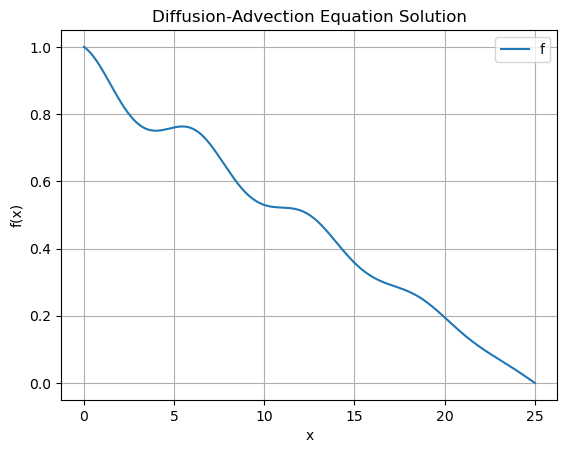

In [25]:
plt.plot(x, f, label='f')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Diffusion-Advection Equation Solution')
plt.legend()
plt.grid(True)
plt.show()

In [26]:
# b
# It is always a good idea to ‘sanity check’ the result of a numerical solution.
# Explain the shape of f(x). Does it make sense compared to the
# physical interpretation of the diffusion-advection equation?

# We start with a high concentration of particles, at x = 0 (1). 
# Over time, due to diffusion and advection, the particles spread out and the concentration becomes smaller. 

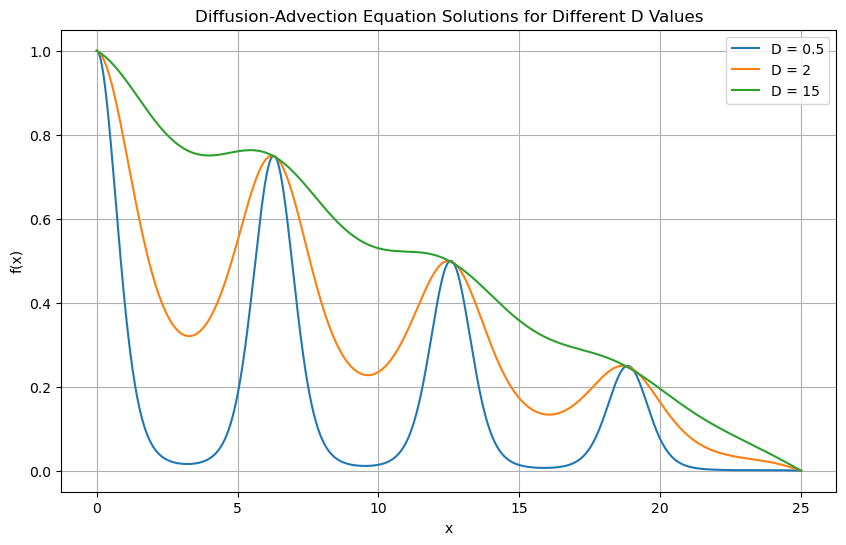

In [27]:
# c
# Explain what happens for D → 0 and D → ∞. Plot for instance
# D = 0.5 and D = 15 and compare to D = 2. Would your code work for
# D = 0?

import numpy as np
import matplotlib.pyplot as plt

D_values = [0.5, 2, 15]
N = 1000
L = 25.0
dx = L / N 

def velocity(x):
    return -np.sin(x)

x = np.linspace(0, L, N)
f_initial = np.zeros(N)
f_initial[0] = 1.0
f_initial[-1] = 0.0

plt.figure(figsize=(10, 6))

for D in D_values:
    f = np.copy(f_initial)

    A1 = np.zeros((N, N))
    A2 = np.zeros((N, N))
    H = np.zeros((N, N))

    for i in range(1, N - 1):
        A1[i, i - 1] = -1 / (2 * dx)
        A1[i, i + 1] = 1 / (2 * dx)

    for i in range(1, N - 1):
        A2[i, i] = -2 / dx**2
        A2[i, i - 1] = 1 / dx**2
        A2[i, i + 1] = 1 / dx**2

    v = velocity(x)
    H = np.diag(v)

    A_temp = A1 @ H
    A = D * A2 - A_temp 
    A[0, 0] = 1
    A[-1, -1] = 1

    f = np.linalg.solve(A, f)

    plt.plot(x, f, label=f'D = {D}')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Diffusion-Advection Equation Solutions for Different D Values')
plt.legend()
plt.grid(True)
plt.show()

# When D approaches 0, the diffusion becomes negligible, and you therefore have a scenario where advection dominates.
# When D approaches ∞, the diffusion becomes more dominant.

In [28]:
# We begin by considering a partial differential equation with only one
# spatial direction. This is basically a 1D boundary value once we discretise
# time.
# Consider the one dimensional heat equation
# ∂f(x,t)/∂t = ∂^2f(x,t)/∂x^2
# with boundary conditions f(0, t) = 1 and ∂_x f(1, t) = 0. This means that
# we keep the left end at temperature 1 and let no heat escape or enter at the
# right end.
# The steady state of this equation is clearly f(x, t) = 1. We will
# consider the time evolution starting from f(x, 0) = e^−5x.
# Using implicit time discretisation we have
# f_{t+dt}(x) = f_t (x) + f_{t+dt}'' (x) dt.

# Use a second order finite difference scheme to turn the above into
# a linear algebra problem using N = 1000 grid points.

#a
import numpy as np
import matplotlib.pyplot as plt

N = 1000
L = 1 
x = np.linspace(0, L, N)
f_initial = np.exp(-5*x)

f = np.exp(-5*x)

dt = 0.05
dx = L/N

steps = 1000

A = np.zeros((N, N))

for i in range(1, N - 1):
    A[i, i] = 1 + 2 * dt / dx**2
    A[i, i - 1] = -dt / dx**2
    A[i, i + 1] = -dt / dx**2

# boundary condition
A[0,0] = 1 
    
A[-1,-1] = (3/2) /dx
A[-1,-2] = (-2)/dx
A[-1,-3] = (1/2)/dx
for i in range(1, steps):
    # boundary condition
    f[0] = 1
    f[-1] = 0
    
    f = np.linalg.solve(A, f)



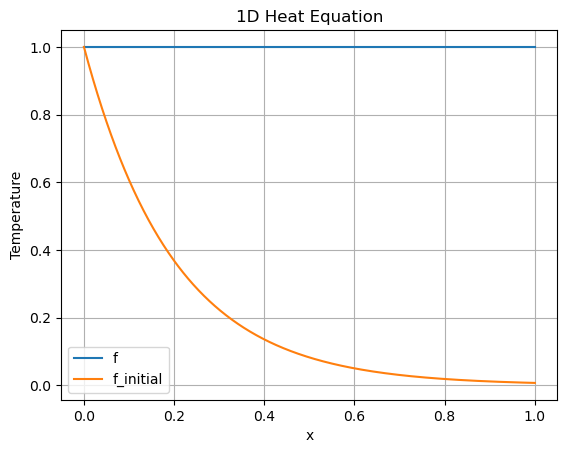

In [29]:
plt.plot(x, f, label='f')
plt.plot(x,f_initial, label='f_initial')
plt.xlabel('x')
plt.ylabel('Temperature')
plt.title('1D Heat Equation')
plt.legend()
plt.grid(True)
plt.show()

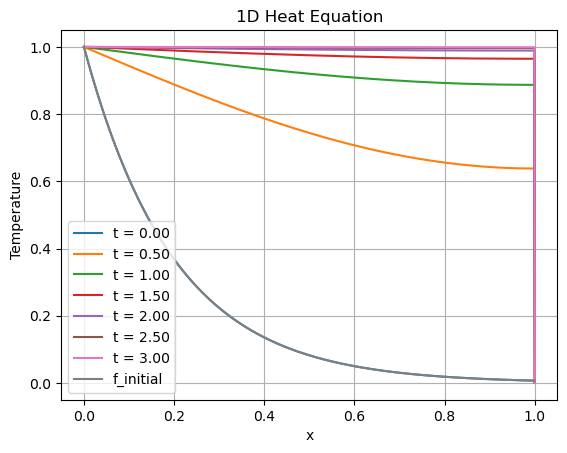

In [30]:
#b
# Solve the system using Δt = 0.05 for t ∈ [0, 3] and plot curves for
# t ∈ {0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0}.

import numpy as np
import matplotlib.pyplot as plt

N = 1000
L = 1
x = np.linspace(0, L, N)
f_initial = np.exp(-5 * x)

f = np.exp(-5 * x)

dt = 0.05
dx = L / N

A = np.zeros((N, N))

for i in range(1, N - 1):
    A[i, i] = 1 + 2 * dt / dx ** 2
    A[i, i - 1] = -dt / dx ** 2
    A[i, i + 1] = -dt / dx ** 2

# boundary condition
A[0, 0] = 1
A[-1, -1] = (3 / 2) / dx
A[-1, -2] = (-2) / dx
A[-1, -3] = (1 / 2) / dx

time_points = [0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0]

for t in range(steps):
    # boundary condition
    f[0] = 1
    f[-1] = 0

    if t * dt in time_points:
        plt.plot(x, f, label=f't = {t * dt:.2f}')

    f = np.linalg.solve(A, f)

plt.plot(x, f_initial, label='f_initial')
plt.xlabel('x')
plt.ylabel('Temperature')
plt.title('1D Heat Equation')
plt.legend()
plt.grid(True)
plt.show()



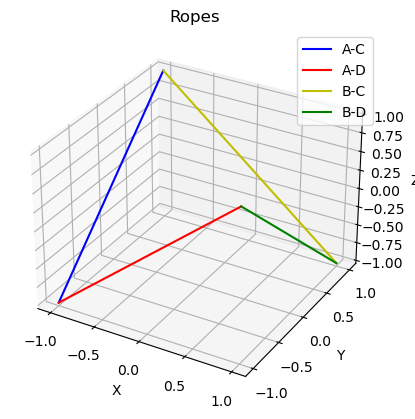

In [31]:
# We are designing a square sun sail for a Danish garden. It rains a lot
# in Denmark, so to ensure that water can drip off easily, we decide to hang
# it by four ropes tied to the following points
# A = (-1,-1,-1)
# B = (1, 1, −1)
# C = (−1, 1, 1)
# D = (1, −1, 1)
# Our four ropes are tightly bound between A-C, A-D, B-C, B-D.

# Plot the four ropes in a 3D plot.
# You can use ax = plt.figure().add_subplot(projection=’3d’)
# to make a 3D plot followed by ax.plot(x, y, z).


#a

import numpy as np
import matplotlib.pyplot as plt

A = np.array([-1, -1, -1])
B = np.array([1, 1, -1])
C = np.array([-1, 1, 1])
D = np.array([1, -1, 1])


ax = plt.figure().add_subplot(projection='3d')

ax.plot([A[0], C[0]], [A[1], C[1]], [A[2], C[2]], color='b', label='A-C')
ax.plot([A[0], D[0]], [A[1], D[1]], [A[2], D[2]], color='r', label='A-D')
ax.plot([B[0], C[0]], [B[1], C[1]], [B[2], C[2]], color='y', label='B-C')
ax.plot([B[0], D[0]], [B[1], D[1]], [B[2], D[2]], color='g', label='B-D')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Ropes')
ax.legend()
plt.show()

 

In [32]:
# The sail’s shape will be determined by Laplace’s equation
# ∇^2 f(x, y) = 0,
# where f here represents the z-coordinate, which we solve on the square
# x,y ∈ [−1, 1] × [−1, 1]. Our boundary conditions are Dirichlet and set
# by the fact that the sail is tied to the ropes.

# Write down the boundary conditions.

#b 
# A: f(-1,-1) = -1
# B: f(1,1) = -1
# C: f(-1,1) = 1
# D: f(1,-1) = 1



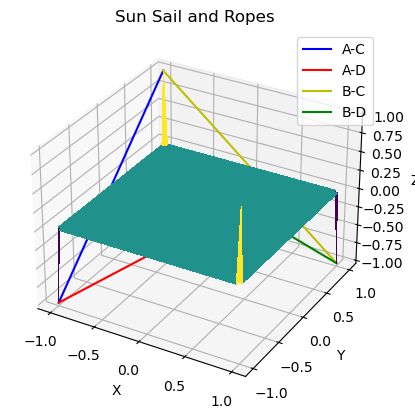

In [33]:
# Solve ∇^2 f(x, y) = 0 with the boundary conditions and 
# plot your solution together with the ropes.
# You can use ax.plot_surface(X, Y, Z, antialiased=False).

#c & d
import numpy as np
import matplotlib.pyplot as plt

N = 50  
x = np.linspace(-1, 1, N)
y = np.linspace(-1, 1, N)
X, Y = np.meshgrid(x, y)

f = np.zeros((N,N))

# bc
f[0, 0] = -1
f[-1, -1] = -1
f[0, -1] = 1
f[-1, 0] = 1

# laplace's equation solution ...
# p. 69?
# I was not able to solve this task.

fig = plt.figure()
ax = fig.add_subplot(projection='3d')


ax.plot_surface(X, Y, f, cmap='viridis',antialiased=False)


ax.plot([A[0], C[0]], [A[1], C[1]], [A[2], C[2]], color='b', label='A-C')
ax.plot([A[0], D[0]], [A[1], D[1]], [A[2], D[2]], color='r', label='A-D')
ax.plot([B[0], C[0]], [B[1], C[1]], [B[2], C[2]], color='y', label='B-C')
ax.plot([B[0], D[0]], [B[1], D[1]], [B[2], D[2]], color='g', label='B-D')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Sun Sail and Ropes')
ax.legend()
plt.show()
